In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from matplotlib.pyplot import MultipleLocator
import time

In [ ]:
data_2 = pd.read_csv("ID2_heartrate.csv",index_col=0)
data_2.sort_values("datetime",inplace=True)
data_3 = pd.read_csv("ID3_heartrate.csv",index_col=0)
data_3.sort_values("datetime",inplace=True)
data_4 = pd.read_csv("ID4_heartrate.csv",index_col=0)
data_4.sort_values("datetime",inplace=True)
data_2.head()

,ID,calenderDate,timeSeconds,HeartRate,time,datetime
0,2,2021-10-14,15,99,00:00:15,1634140815
1,2,2021-10-14,30,99,00:00:30,1634140830
2,2,2021-10-14,45,99,00:00:45,1634140845
3,2,2021-10-14,60,99,00:01:00,1634140860
4,2,2021-10-14,75,99,00:01:15,1634140875


In [ ]:
record = pd.read_csv("record2.csv",index_col=0)
record.head(5)

,id,日期,睡覺時間,起床時間,總睡眠時間,睡前心跳,起床心跳,配戴手,寬鬆,干擾,壓力,疲憊,夜燈,溫度,咖啡因,sleep_datetime,wake_datetime
0,4,2021/10/23,23:30,7:30,8.00,72,77,L,9,0,1,1,1,22,1,1635003000,1635031800
1,4,2021/10/24,23:00,7:00,8.00,70,75,L,9,0,1,1,1,22,0,1635087600,1635116400
2,2,2021/10/24,23:30,9:30,10.00,64,71,L,4,1,1,1,0,27,1,1635089400,1635125400
3,4,2021/10/25,23:00,7:00,8.00,65,79,L,9,0,1,0,1,22,0,1635174000,1635202800
4,3,2021/10/25,01:20,7:30,6.16,74,84,L,6,0,1,1,1,25,0,1635182400,1635204600


In [ ]:
def findsametime(data,id):
    a = list(set(data))
    a.sort()
    b = list(set(record[record["id"]==id]["日期"]))
    b.sort()
    same_time = []
    for i in b:
        i = i.replace("/","-")
        if i in a:
            same_time.append(i)        
    return same_time

In [ ]:
#找手動測量資料與garmin資料相同日期
print("ID2 sametime: ",findsametime(data_2["calenderDate"],2))
print("ID3 sametime: ",findsametime(data_3["calenderDate"],3))
print("ID4 sametime: ",findsametime(data_4["calenderDate"],4))

ID2 sametime:  ['2021-10-25', '2021-10-26', '2021-10-27', '2021-10-28', '2021-10-29', '2021-11-02', '2021-11-10', '2021-11-17', '2021-11-22', '2021-11-23', '2021-11-24', '2021-11-28']
ID3 sametime:  []
ID4 sametime:  ['2021-10-26', '2021-10-27', '2021-10-28', '2021-10-30', '2021-10-31', '2021-11-10', '2021-11-16', '2021-11-17', '2021-11-20', '2021-11-21', '2021-11-22', '2021-11-23', '2021-11-24', '2021-11-25', '2021-11-26', '2021-11-27', '2021-11-28', '2021-11-29']


In [ ]:
record2 = record[record["id"]==2]
record3 = record2[record2["日期"]=='2021/10/29']
sd = int(record3["sleep_datetime"])
wd = int(record3["wake_datetime"])
print(sd)
print(wd)

1635526800
1635555600


In [ ]:
same_time = findsametime(data_2["calenderDate"],2)
data2 = data_2[data_2["ID"]==2]
record2 = record[record["id"]==2]
for i in same_time:
    i = i.replace("-","/")
    sd = int(record2[record2["日期"]==i]["sleep_datetime"])
    wd = int(record2[record2["日期"]==i]["wake_datetime"])
    if (sd in list(data2["datetime"])) and (wd in list(data2["datetime"])):
        st = list(data2["datetime"]).index(sd)
        wt = list(data2["datetime"]).index(wd)
        print("{}  手動紀錄睡覺時間:{} 起床時間:{}".format(i,sd,wd))
        print("Garmin紀錄時間: ",st,"-",wt)
    else:
        continue

2021/10/25  手動紀錄睡覺時間:1635183000 起床時間:1635211800
Garmin紀錄時間:  44722 - 48562
2021/10/26  手動紀錄睡覺時間:1635269400 起床時間:1635294600
Garmin紀錄時間:  57678 - 64436
2021/10/27  手動紀錄睡覺時間:1635354000 起床時間:1635377400
Garmin紀錄時間:  69373 - 74053
2021/10/28  手動紀錄睡覺時間:1635396600 起床時間:1635469200
Garmin紀錄時間:  76870 - 86301
2021/11/02  手動紀錄睡覺時間:1635870600 起床時間:1635901200
Garmin紀錄時間:  103675 - 113875
2021/11/10  手動紀錄睡覺時間:1636565400 起床時間:1636597800
Garmin紀錄時間:  153543 - 155703
2021/11/17  手動紀錄睡覺時間:1637168400 起床時間:1637193600
Garmin紀錄時間:  167843 - 169523
2021/11/22  手動紀錄睡覺時間:1637600400 起床時間:1637629200
Garmin紀錄時間:  181519 - 183439
2021/11/23  手動紀錄睡覺時間:1637688600 起床時間:1637715600
Garmin紀錄時間:  188117 - 193517
2021/11/24  手動紀錄睡覺時間:1637773200 起床時間:1637798400
Garmin紀錄時間:  201634 - 203323
2021/11/28  手動紀錄睡覺時間:1638124200 起床時間:1638144000
Garmin紀錄時間:  224067 - 225387


In [ ]:
def drawpic(data,ID,date,st,wt):
    x = data["time"][st:wt]
    y = data["HeartRate"][st:wt]
    
    fig = plt.figure(figsize=(15,6))
    ax=plt.gca()
    
    count = 0
    for i in y:
        if i>=60 and i<=100:
            count+=1
    if count == 0:
        per = 0
    else:
        per = round(count/len(y),2)*100
        
    plt.title("ID:{} {} sleep_data \nnormal hr times:{}/{} {}%".format(ID,date,count,len(y),per),size=20)
    plt.xlabel("time",size=20)
    plt.xticks(rotation=45)
    plt.ylabel("heartrate",size=20)
    
    plt.axhline(y=60, xmin=0.05, xmax=0.95,color="red")
    plt.axhline(y=100, xmin=0.05, xmax=0.95,color="red")
    
    ax.xaxis.set_major_locator(MultipleLocator(100))
    plt.plot(x,y)
    plt.show()

手環與手動紀錄相同時間資料:
2021/10/25 01:30 - 9:30


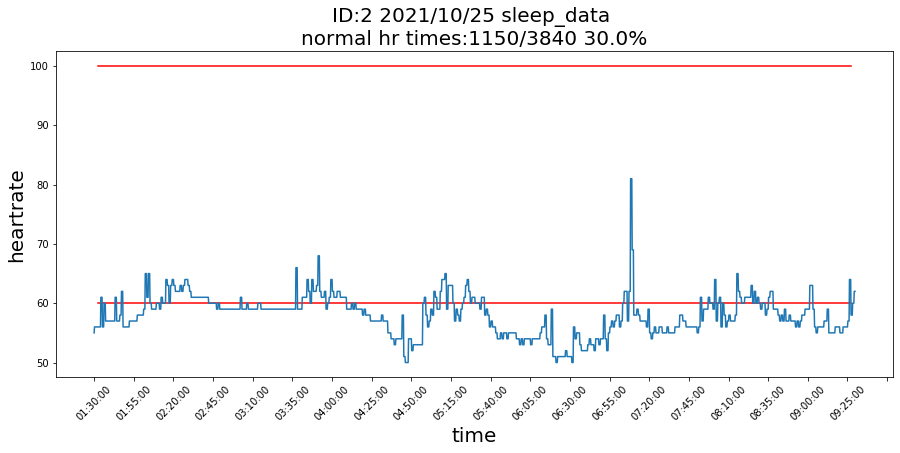

手環與手動紀錄相同時間資料:
2021/10/26 01:30 - 8:30


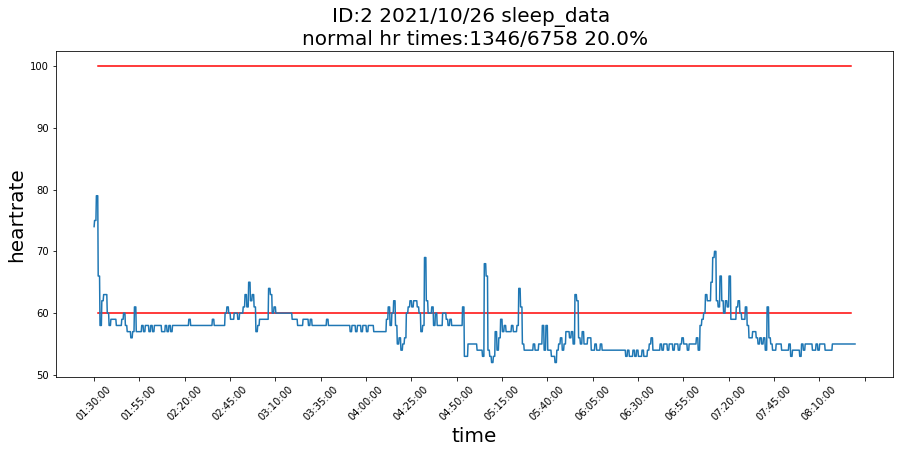

手環與手動紀錄相同時間資料:
2021/10/27 01:00 - 7:30


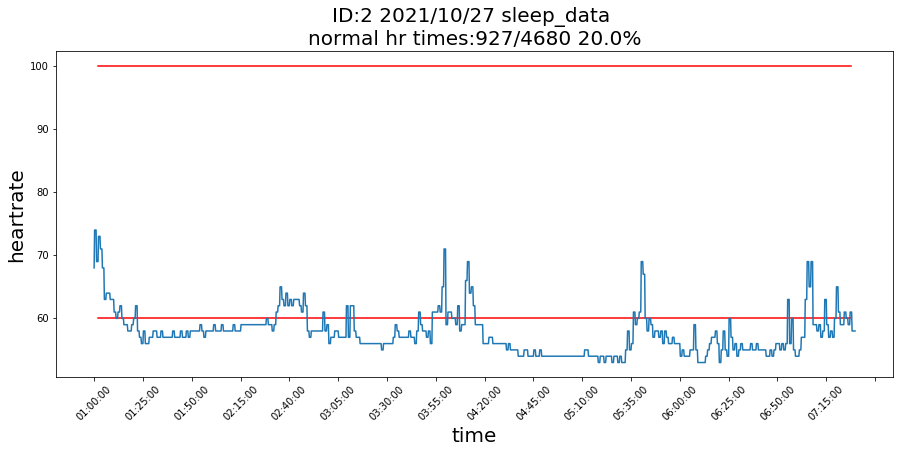

手環與手動紀錄相同時間資料:
2021/10/28 12:50 - 9:00


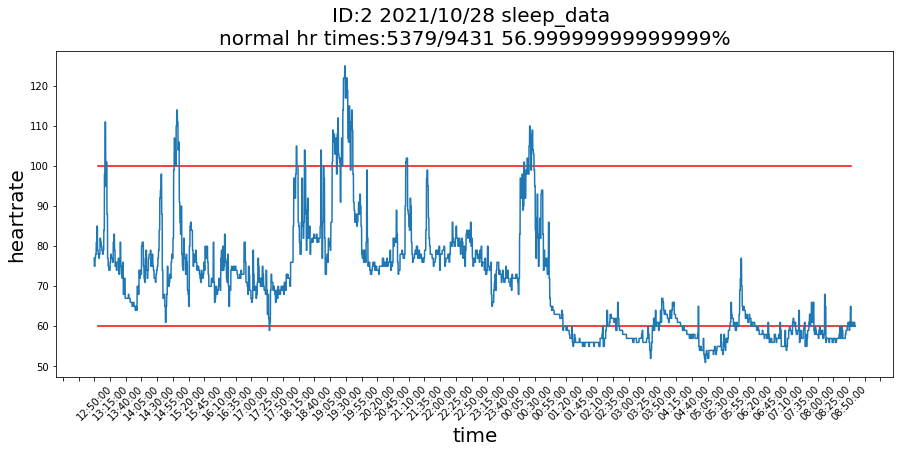

手環與手動紀錄相同時間資料:
2021/11/02 00:30 - 9:00


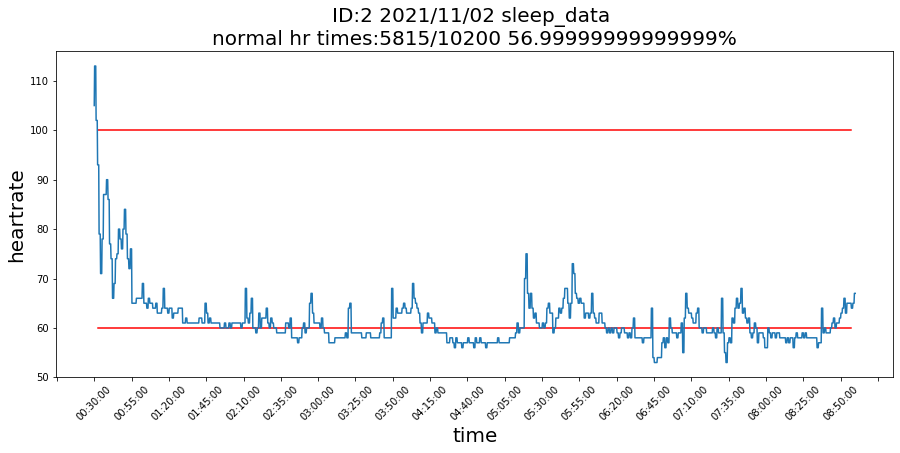

手環與手動紀錄相同時間資料:
2021/11/10 01:30 - 10:30


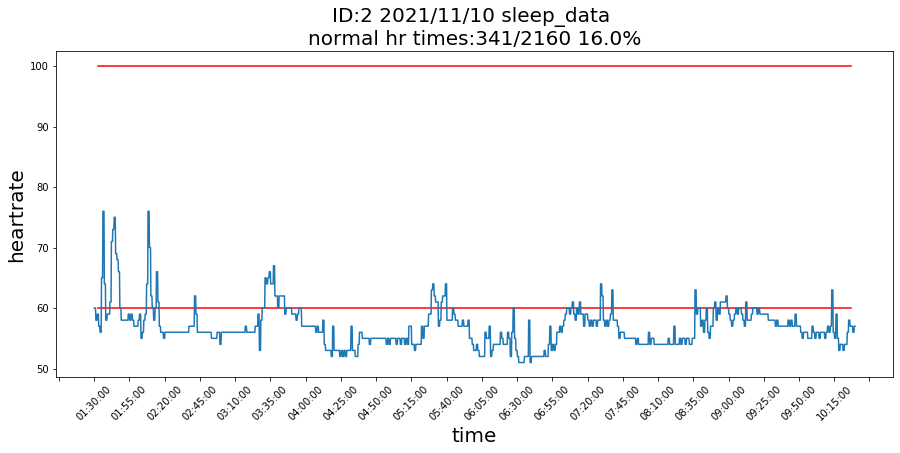

手環與手動紀錄相同時間資料:
2021/11/17 01:00 - 8:00


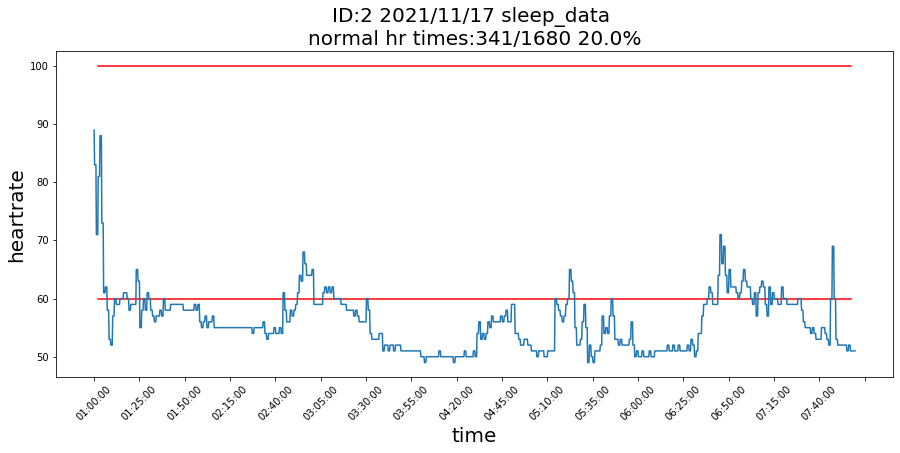

手環與手動紀錄相同時間資料:
2021/11/22 01:00 - 9:00


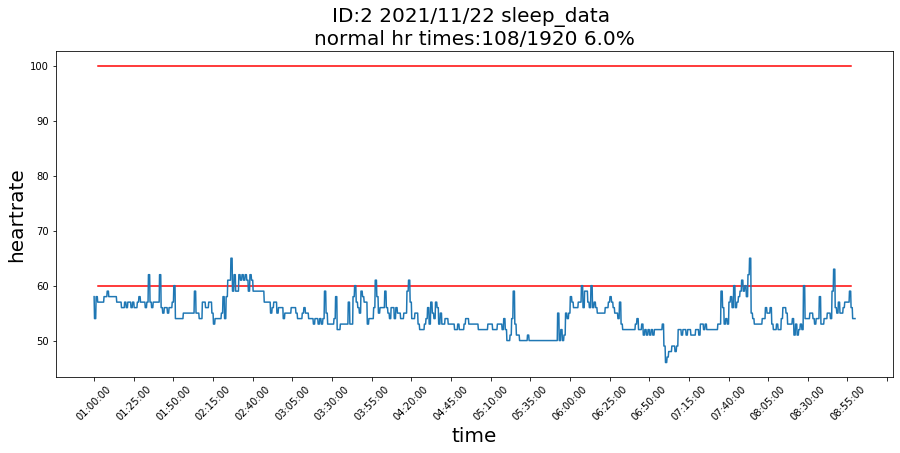

手環與手動紀錄相同時間資料:
2021/11/23 01:30 - 9:00


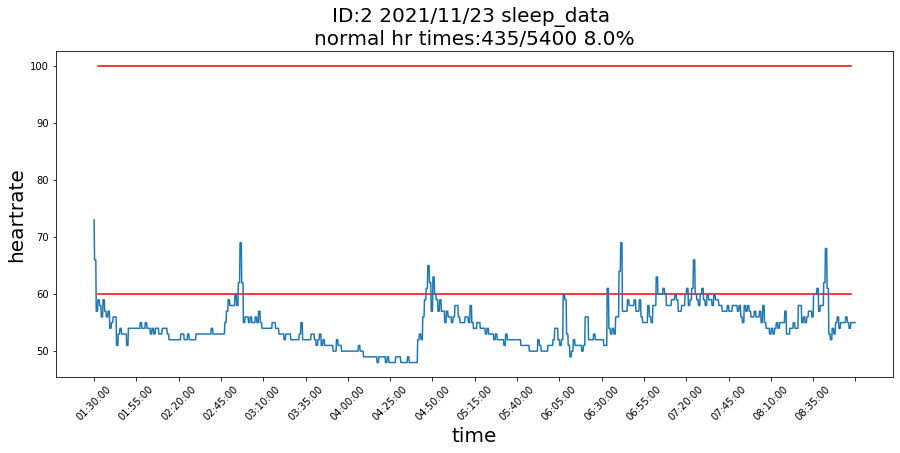

手環與手動紀錄相同時間資料:
2021/11/24 01:00 - 8:00


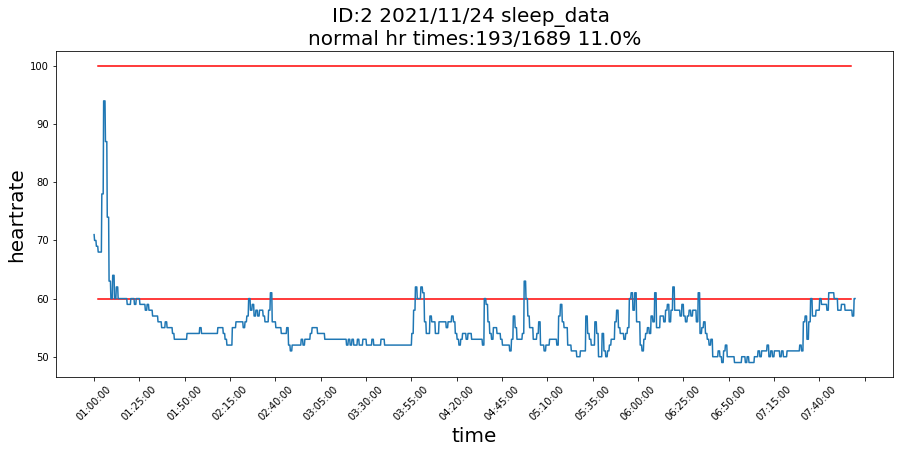

手環與手動紀錄相同時間資料:
2021/11/28 02:30 - 8:00


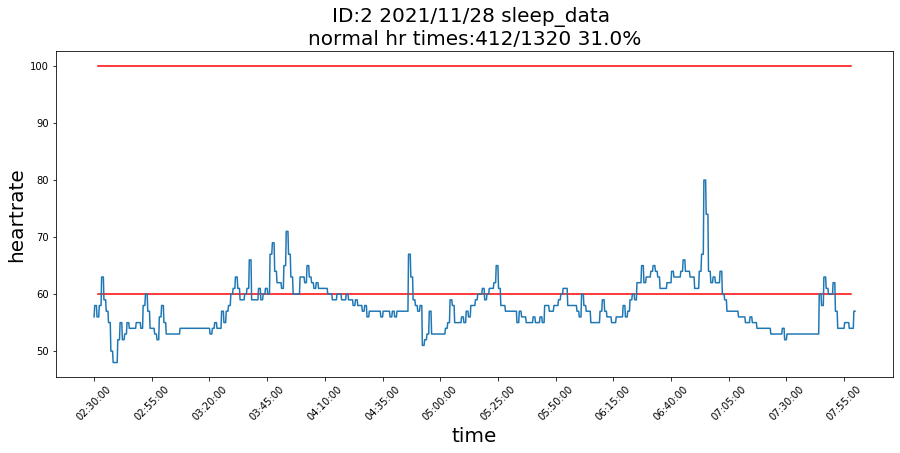

In [ ]:
same_time = findsametime(data_2["calenderDate"],2)
data2 = data_2[data_2["ID"]==2]
record2 = record[record["id"]==2]
for i in same_time:
    i = i.replace("-","/")
    r = record2[record2["日期"]==i]
    sd = int(r["sleep_datetime"])
    wd = int(r["wake_datetime"])
    
    if (sd in list(data2["datetime"])) and (wd in list(data2["datetime"])):
        st = list(data2["datetime"]).index(sd)
        wt = list(data2["datetime"]).index(wd)
        print("手環與手動紀錄相同時間資料:")
        print("{} {} - {}".format(i,r["睡覺時間"].iloc[0],r["起床時間"].iloc[0]))
        drawpic(data2,2,i,st,wt)
    else:
        continue

手環與手動紀錄相同時間資料:
2021/10/27 23:00 - 6:30


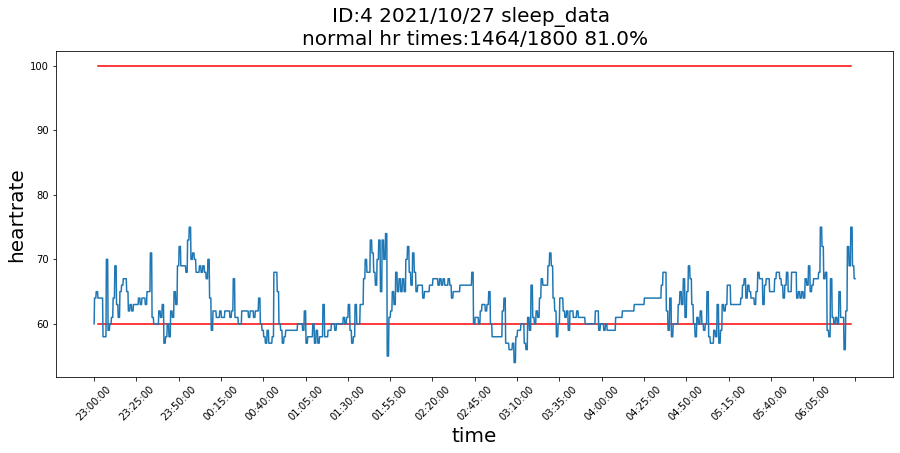

手環與手動紀錄相同時間資料:
2021/10/28 23:00 - 6:30


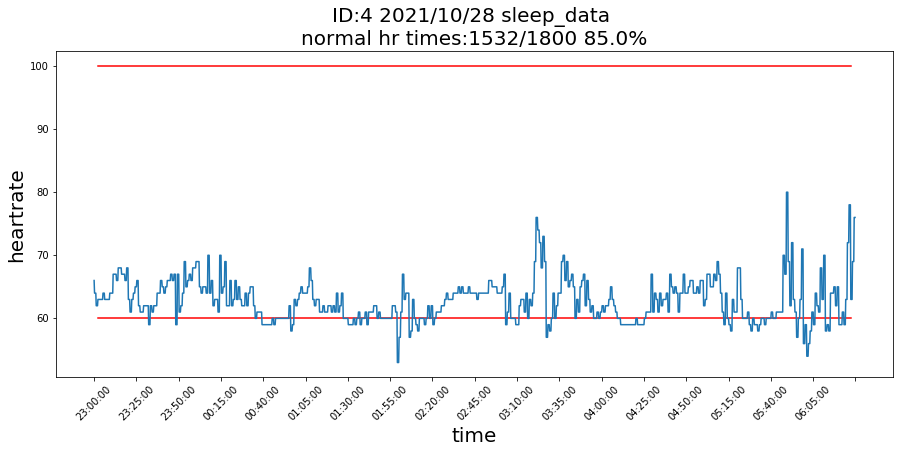

手環與手動紀錄相同時間資料:
2021/10/30 01:00 - 7:00


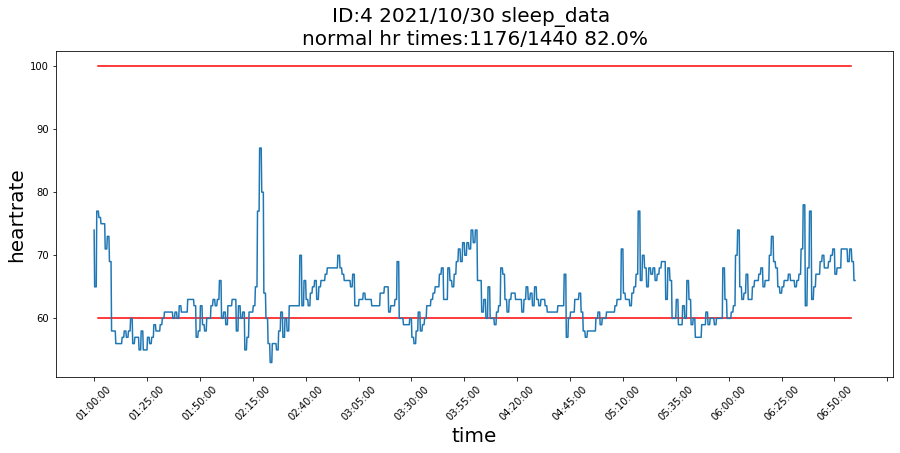

手環與手動紀錄相同時間資料:
2021/10/31 00:00 - 6:30


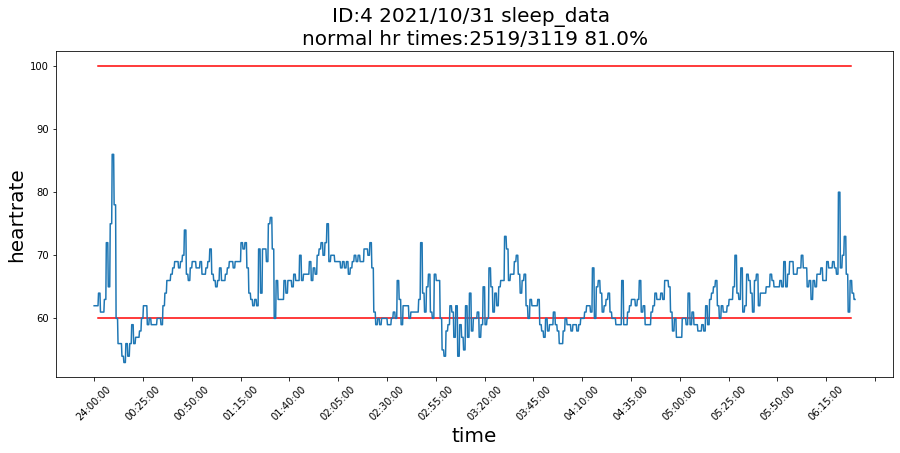

手環與手動紀錄相同時間資料:
2021/11/16 23:00 - 7:00


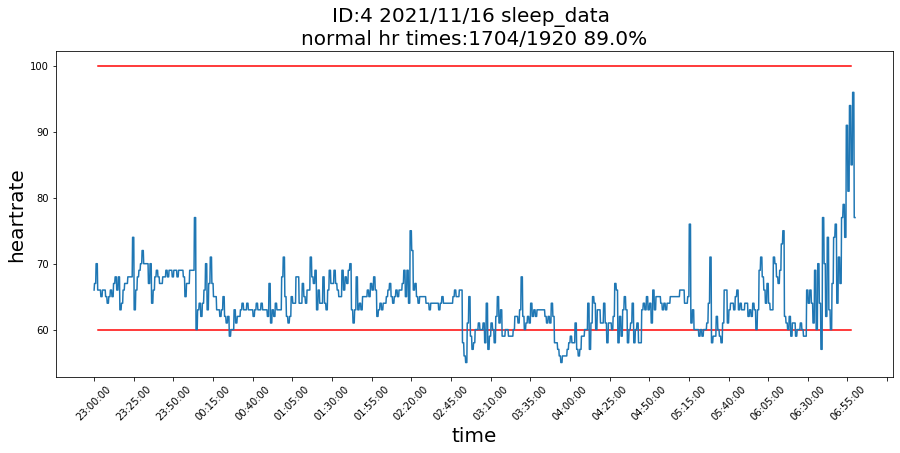

手環與手動紀錄相同時間資料:
2021/11/17 23:00 - 6:45


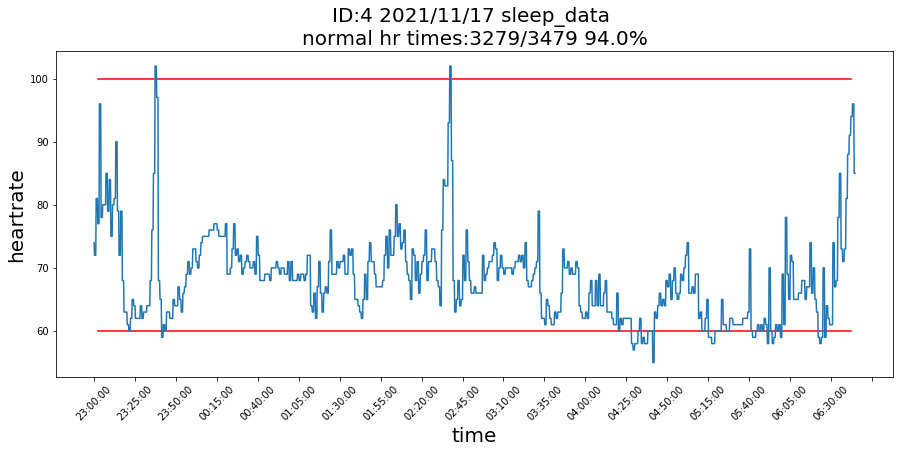

手環與手動紀錄相同時間資料:
2021/11/21 23:00 - 7:15


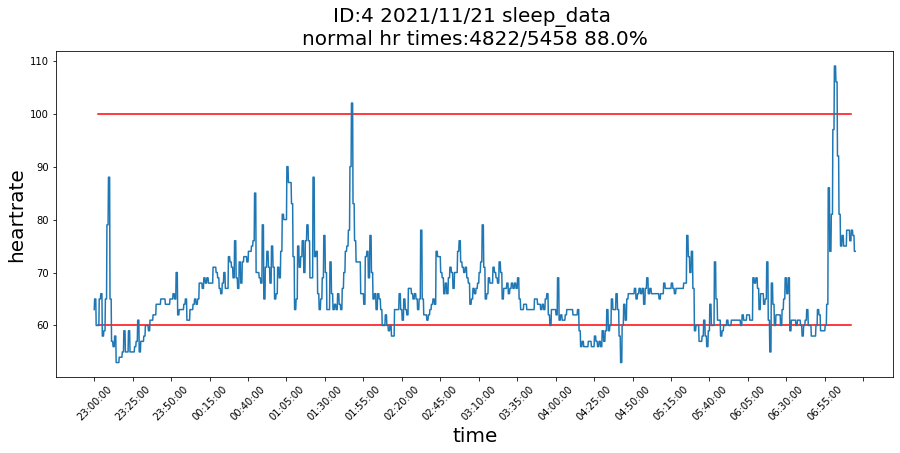

手環與手動紀錄相同時間資料:
2021/11/22 23:00 - 7:15


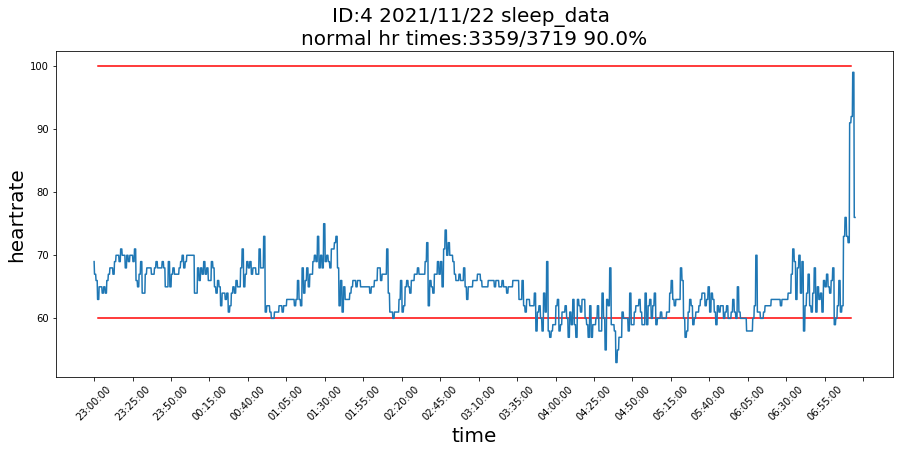

手環與手動紀錄相同時間資料:
2021/11/23 23:00 - 7:00


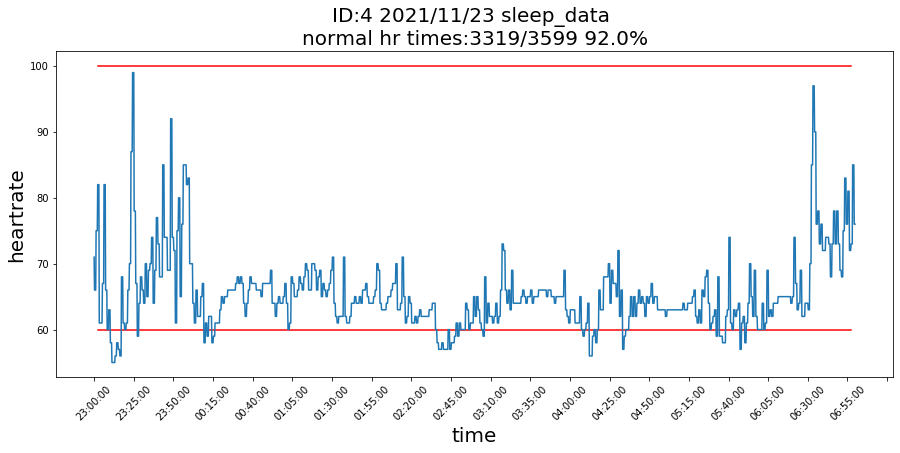

手環與手動紀錄相同時間資料:
2021/11/24 23:30 - 6:15


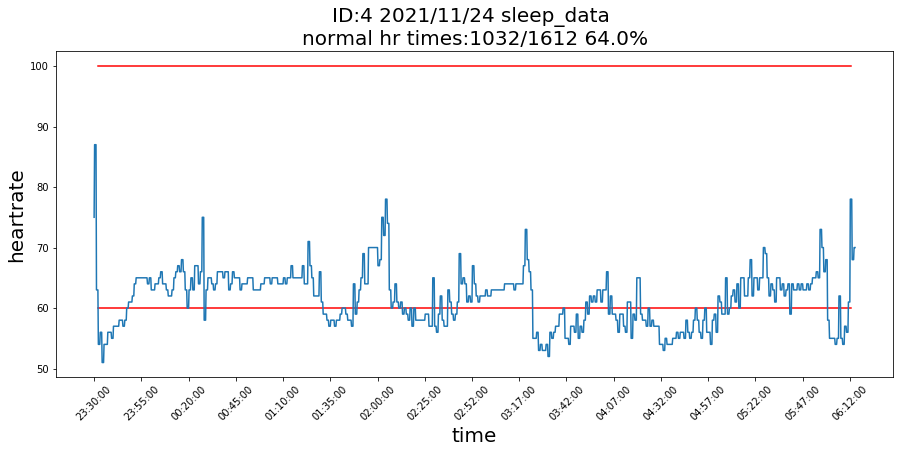

手環與手動紀錄相同時間資料:
2021/11/25 23:00 - 7:00


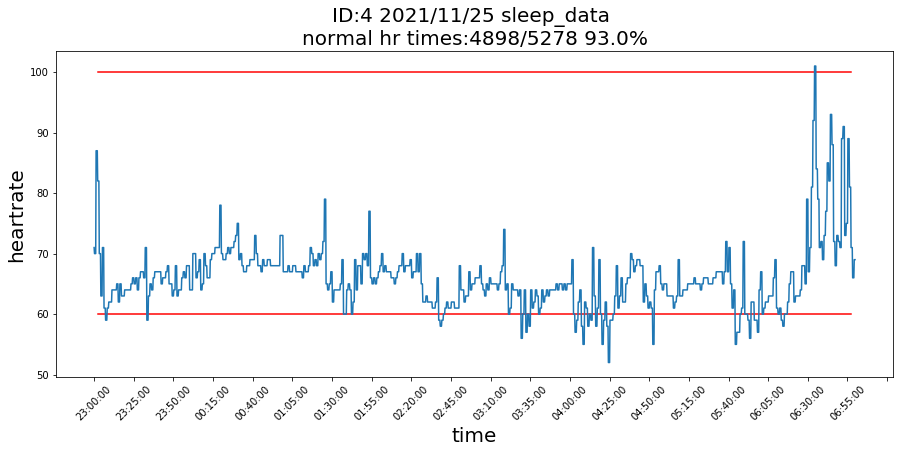

手環與手動紀錄相同時間資料:
2021/11/27 23:20 - 6:30


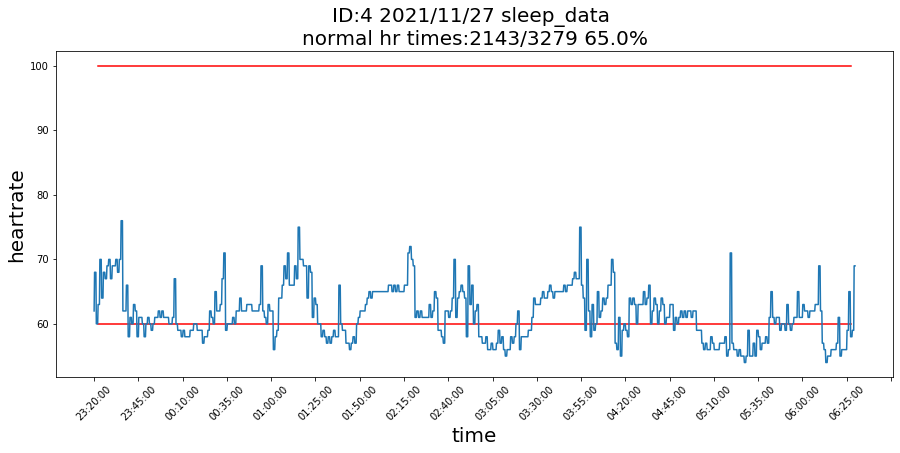

手環與手動紀錄相同時間資料:
2021/11/28 23:00 - 6:30


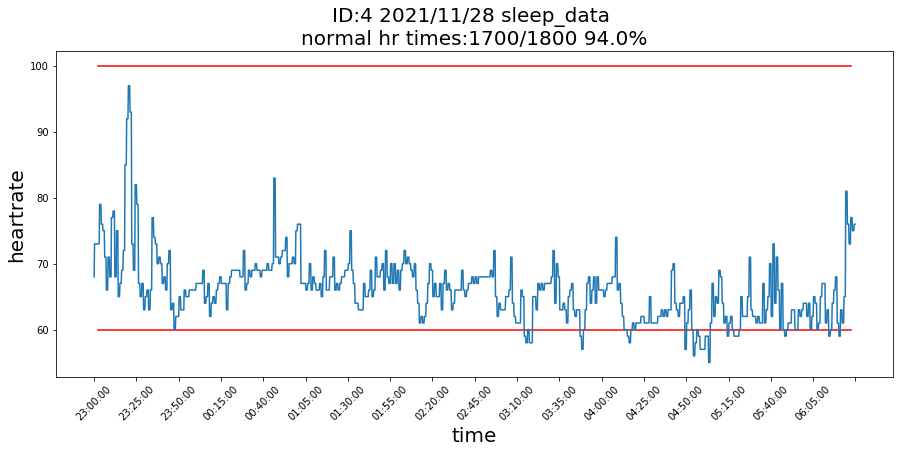

手環與手動紀錄相同時間資料:
2021/11/29 23:30 - 6:50


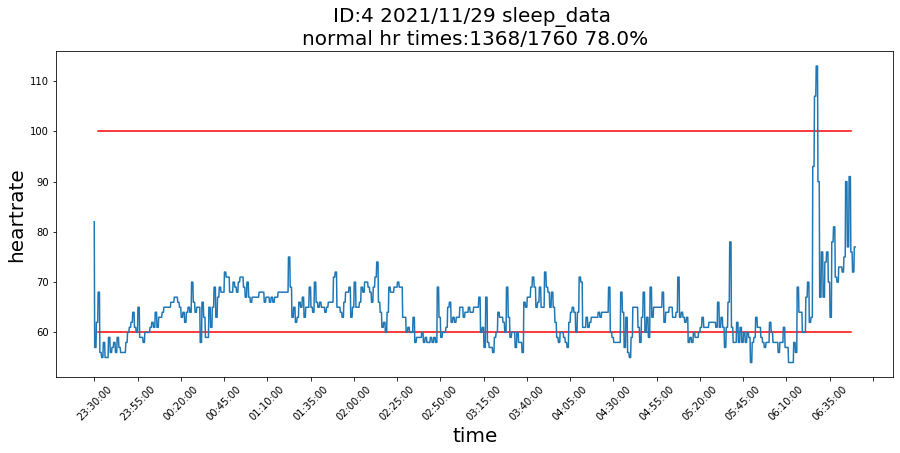

In [ ]:
same_time = findsametime(data_4["calenderDate"],4)
data2 = data_4[data_4["ID"]==4]
record2 = record[record["id"]==4]
for i in same_time:
    i = i.replace("-","/")
    r = record2[record2["日期"]==i]
    sd = int(r["sleep_datetime"])
    wd = int(r["wake_datetime"])
    
    if (sd in list(data2["datetime"])) and (wd in list(data2["datetime"])):
        st = list(data2["datetime"]).index(sd)
        wt = list(data2["datetime"]).index(wd)
        print("手環與手動紀錄相同時間資料:")
        print("{} {} - {}".format(i,r["睡覺時間"].iloc[0],r["起床時間"].iloc[0]))
        drawpic(data2,4,i,st,wt)
    else:
        continue